In [ ]:
import os
print(os.getcwd())
os.chdir('experimentation_files')



/mnt/c/Users/User/MSc_Project/energy_budget_PET_framework-1


In [2]:
#Libraries
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import minimize
import sys
import io
import warnings
from datetime import datetime


data_original = pd.read_csv('privacy_utility_records.csv',  encoding='utf-8')

data = pd.read_csv('privacy_utility_records.csv',  encoding='utf-8')
data = data.drop('dataset_name', axis=1)






In [ ]:
psps = data_original.iloc[:int(0.19 * len(data))]
print(psps['dataset_name'])

0                   autism
1                   autism
2                   german
3                   german
4                  nursery
5                  nursery
6                  obesity
7                  obesity
8     productivity_garment
9     productivity_garment
10                Adult_v2
11                Adult_v2
12             student-por
13             student-por
14                 abalone
15                 abalone
16                    bank
17                    bank
18               bank-full
19               bank-full
20          Adult_test_v2 
21          Adult_test_v2 
22          Adult_train_v2
23          Adult_train_v2
24         catheterization
25         catheterization
26                 coupons
27                 coupons
28         default_credit 
29         default_credit 
30              support2_3
31              support2_3
32       taiwan_bankrupt_3
33       taiwan_bankrupt_3
34                  indian
35                  indian
36                 recipes
3

In [4]:
def count_outliers_per_record(df, features):
    outlier_counts = []  #
    df_2 = df.copy()
    df_2[features] = df_2[features].apply(pd.to_numeric, errors='coerce')
    #
    for index, row in df_2.iterrows():
        outlier_count = 0
        for feature in features:
            Q1 = df_2[feature].quantile(0.25)
            Q3 = df_2[feature].quantile(0.75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            
            
            if row[feature] < Q1 - outlier_step or row[feature] > Q3 + outlier_step:
                outlier_count += 1
        
        outlier_counts.append(outlier_count)
    
    return outlier_counts

In [ ]:
features = [
    'epsilon',
    'avg_cat_uniqueness_ratio',
    'entropy',
    'imbalance_ratio',
    'kurtosis',
    'max_categorical_unique',
    'max_continuous_correlation',
    'max_std_dev',
    'max_variance',
    'mean_categorical_unique',
    'mean_continuous_correlation',
    'mean_std_dev',
    'mean_variance',
    'min_categorical_unique',
    'num_attributes',
    'num_categorical_attributes',
    'num_continuous_attributes',
    'num_records',
    'outlier_percentage',
    'size_mb',
    'skewness'
 ]
features_temp = [
    # 'epsilon',
    'avg_cat_uniqueness_ratio',
    'entropy',
    'imbalance_ratio',
    'kurtosis',
    'max_categorical_unique',
    'max_continuous_correlation',
    'max_std_dev',
    'max_variance',
    'mean_categorical_unique',
    'mean_continuous_correlation',
    'mean_std_dev',
    'mean_variance',
    'min_categorical_unique',
    'num_attributes',
    'num_categorical_attributes',
    'num_continuous_attributes',
    'num_records',
    'outlier_percentage',
    'size_mb',
    'skewness'
]
target_ml = 'accuracy_logres'

In [ ]:
import warnings
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
def comp_func(actual_values):
    result = []
    for i in range(0, len(actual_values), 2):
        # Make sure there is a pair to compare
        if i + 1 < len(actual_values):
            first = actual_values[i]
            second = actual_values[i + 1]

            if first > second:
                result.append(0)
            elif first == second:
                result.append(2)
            else:
                result.append(1)
    return result
    

def our_ml(dataset, test_size, our_features, estimators, learning_rate, depth, target, scalee):
   
    split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = dataset[list(our_features)]
    y = dataset[target]
    X_train = X.iloc[split_index:]
    X_test = X.iloc[:split_index]

    y_train = y.iloc[split_index:]
    y_test = y.iloc[:split_index]


    
    gb_model = GradientBoostingRegressor(n_estimators=estimators, learning_rate=learning_rate, max_depth=depth, random_state=42)
    gb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb_model.predict(X_test)
    print('Conditions:')
    print(f'Size: {len(dataset)}')
    print(f'Test size percent is: {test_size}')
    print(f'Attributes: {our_features}')
    print('Actual')
    print(list(y_test))
    print('Prediction')
    print(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Gradient Boosting MSE:", mse)
    print("Gradient Boosting R²:", r2)

    feature_importances = gb_model.feature_importances_

    importances = pd.Series(feature_importances, index=our_features)
    
    if len(y_pred) % 2 == 0:
        aa = []
        res_act = comp_func(y_test.reset_index(drop=True))
        res_pred = comp_func(y_pred)
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)
        
        print(aa)
        
        num = aa.count(True)
        length = len(aa)
        print(f'Accuracy of the comparison which one more consumable/accurate/riskier: {(num / length) * 100} %')
        
        print('Prediction vs Actual')
        y_test_2 = list(y_test)
        ll = 0
        mm = 0
        for i in range(len(y_pred)):
            ll += 1
            print(f'{y_pred[i]}  -  {y_test_2[i]}' )
            if ll % 2 == 0:
                print(aa[mm])
                mm += 1
                print('\n')
            ...
    else:
        print('Fix the test size for even number of values.')
        y_pred = 0
        y_test_2 = 0


  
    return gb_model, y_pred, y_test_2, importances


def lightgbm_ml(our_data, our_features, target, perc, scalee, n_estimators=100, learning_rate=0.1):
    warnings.simplefilter(action='ignore', category=UserWarning)
    test_size = perc
    split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = our_data[list(our_features)]
    y = our_data[target]
    X_train = X.iloc[split_index:]
    X_test = X.iloc[:split_index]

    y_train = y.iloc[split_index:]
    y_test = y.iloc[:split_index]
   
   

    model = lgb.LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42, verbose=-1)
    
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    if len(y_pred) % 2 == 0 and len(y_test) % 2 == 0:
        aa = []
        y_test_2 = y_test.reset_index(drop=True)
        y_pred_2 = pd.Series(y_pred).reset_index(drop=True)
        res_act = comp_func(y_test_2)
        res_pred = comp_func(y_pred_2)
        
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)
        num = aa.count(True)
        length = len(aa)
        acc = (num / length) * 100
    else:
        aa = []
        acc = 0

    print('\n')
    print(f'Conditions for {target}:')
    print("LightGBM Regression")
    if scalee == 1:
        print("With Scaler")
    print(f'Number of Estimators: {n_estimators}')
    print(f'Learning Rate: {learning_rate}')
    print(f"Best MSE: {mse:.10f}")
    print(f"Best R²: {r2:.10f}")
    print(f'Test size: {perc}')
    print(f"Best Feature Combination: {our_features}")
    print(f'Accuracy: {acc}%')
    
    print("Feature Importances:")
    single_importances_series = pd.Series(model.feature_importances_ , index=our_features)
    importances_percentages = (single_importances_series / single_importances_series.sum())
    print(importances_percentages)
   
    
    # importances_sorted = single_importances_series.sort_values(ascending=False)
    return model, y_pred.tolist(), y_test.tolist(), importances_percentages




# Best result, that was acquired using Brute Force!

In [ ]:
def our_ml_original(dataset, test_size, our_features, estimators, learning_rate, depth, target, scalee):
    
    split_index = int((1 - test_size) * len(data))
    X = dataset[list(our_features)]
    y = dataset[target]
    if scalee == 1:
            continuous_ones = [i for i in our_features if i != 'epsilon']

            X_scaled = X.copy()
            X_scaled[continuous_ones] = RobustScaler().fit_transform(X[continuous_ones])

            
            X_train = X_scaled.iloc[:split_index]
            X_test = X_scaled.iloc[split_index:]
            
    else:
        X_train = X.iloc[:split_index]
        X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    
    

    
    gb_model = GradientBoostingRegressor(n_estimators=estimators, learning_rate=learning_rate, max_depth=depth, random_state=42)
    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)
    print('Conditions:')
    print(f'Size: {len(dataset)}')
    print(f'Test size percent is: {test_size}')
    print(f'Attributes: {our_features}')
    print('Actual')
    print(list(y_test))
    print('Prediction')
    print(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Gradient Boosting MSE:", mse)
    print("Gradient Boosting R²:", r2)

    feature_importances = gb_model.feature_importances_

    importances = pd.Series(feature_importances, index=our_features)
    
    if len(y_pred) % 2 == 0:
        aa = []
        res_act = comp_func(y_test.reset_index(drop=True))
        res_pred = comp_func(y_pred)
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)
        
        print(aa)
        
        num = aa.count(True)
        length = len(aa)
        print(f'Accuracy of the comparison which one more consumable/accurate/riskier: {(num / length) * 100} %')
        
        print('Prediction vs Actual')
        y_test_2 = list(y_test)
        ll = 0
        mm = 0
        for i in range(len(y_pred)):
            ll += 1
            print(f'{y_pred[i]}  -  {y_test_2[i]}' )
            if ll % 2 == 0:
                print(aa[mm])
                mm += 1
                print('\n')
            ...
    else:
        print('Fix the test size for even number of values.')
        y_pred = 0
        y_test_2 = 0


  
    return gb_model, y_pred, y_test_2, importances

"""

    models = 2,learning_rate = 1, n_estimators=100 ,
    New best R²: 0.5897087017, MSE: 0.0022030524, Compare Accuracy: 93.10% with features: ['epsilon', 'entropy', 'avg_cat_uniqueness_ratio', 'mean_std_dev', 
    'mean_variance', 'min_categorical_unique']

"""
#our_ml_original(dataset, test_size, our_features, estimators, learning_rate, depth, target, scalee):
features_brute = ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'skewness', 'imbalance_ratio', 'max_categorical_unique', 'num_records', 'num_attributes', 'max_continuous_correlation', 'size_mb', 'min_categorical_unique']
our_ml_original(data, 0.19, features_brute, 100, 0.1, 3, 'accuracy_logres', 0)

Conditions:
Size: 304
Test size percent is: 0.19
Attributes: ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'skewness', 'imbalance_ratio', 'max_categorical_unique', 'num_records', 'num_attributes', 'max_continuous_correlation', 'size_mb', 'min_categorical_unique']
Actual
[0.502762431, 0.574585635, 0.736040609, 0.517766497, 0.551122195, 0.546134663, 0.57985258, 0.508599509, 0.671201814, 0.530612245, 0.528938907, 0.546623794, 0.605769231, 0.5, 0.534883721, 0.562790698, 0.659574468, 0.539007092, 0.647435897, 0.528846154, 0.661417323, 0.514435696, 0.690594059, 0.569306931, 0.580078125, 0.51953125, 0.611829945, 0.500924214, 0.52739726, 0.592465753, 0.646666667, 0.501666667, 0.643851508, 0.512761021, 0.575502268, 0.5191186, 0.675925926, 0.518518519, 0.710344828, 0.593103448, 0.59375, 0.43125, 0.557471264, 0.551724138, 0.761261261, 0.477477477, 0.633858268, 0.5, 0.678018576, 0.520123839, 0.535452323, 0.498777506, 0.684705882, 0.541176471, 0.72027972, 0.491841492, 0.640522876, 0.575163399]

(GradientBoostingRegressor(random_state=42),
 array([0.57348459, 0.54513307, 0.64531257, 0.5050097 , 0.64272401,
        0.50242114, 0.64361114, 0.50068424, 0.6461892 , 0.51655052,
        0.64365935, 0.55053162, 0.6471987 , 0.51851892, 0.5776037 ,
        0.54625284, 0.60302675, 0.47456848, 0.67136874, 0.49900763,
        0.64961805, 0.4945364 , 0.67224733, 0.49988622, 0.64684811,
        0.56041353, 0.64819741, 0.49426779, 0.49015879, 0.53752662,
        0.64844438, 0.48804808, 0.66676834, 0.52091453, 0.65456577,
        0.53334315, 0.7233648 , 0.52759446, 0.70454257, 0.51228748,
        0.59086947, 0.52038375, 0.52265271, 0.5456773 , 0.68284294,
        0.50785781, 0.67961608, 0.52447711, 0.67113201, 0.49614688,
        0.58009126, 0.56039365, 0.6789766 , 0.51094046, 0.67824743,
        0.51655052, 0.72077938, 0.51711212]),
 [0.502762431,
  0.574585635,
  0.736040609,
  0.517766497,
  0.551122195,
  0.546134663,
  0.57985258,
  0.508599509,
  0.671201814,
  0.530612245,
  0.52893890

# Now, Let's take a look at if the feature analyses will demonstrate better results.

## Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import lightgbm as lgb

import numpy as np

def comp_func(actual_values):
    result = []
    for i in range(0, len(actual_values), 2):
        # Make sure there is a pair to compare
        if i + 1 < len(actual_values):
            first = actual_values[i]
            second = actual_values[i + 1]

            if first > second:
                result.append(0)
            elif first == second:
                result.append(2)
            else:
                result.append(1)
    return result

def our_sfs_ml(dataset, test_size, our_features, estimators, learning_rate, depth, n_features, scalee, direction_s = 'forward'):
    split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = dataset[list(our_features)]
    y = dataset[target_ml]
    X_train = X.iloc[split_index:]
    X_test = X.iloc[:split_index]

    y_train = y.iloc[split_index:]
    y_test = y.iloc[:split_index]
   
   
    gb_model = GradientBoostingRegressor(n_estimators=estimators, learning_rate=learning_rate, max_depth=depth, random_state=42)
    
    # Perform Sequential Feature Selection
    sfs = SequentialFeatureSelector(gb_model, n_features_to_select=n_features, direction=direction_s, scoring='r2', n_jobs=-1)
    sfs.fit(X_train, y_train)
    
    selected_features = list(X_train.columns[sfs.get_support()])
    
    if 'epsilon' not in selected_features:
        return sfs, selected_features, -100, -100, None, 0

    # Refit the model using only the selected features
    gb_model.fit(X_train[selected_features], y_train)

    # Make predictions on the test set using the refitted model
    y_pred = gb_model.predict(X_test[selected_features])
    y_pred = np.clip(y_pred, a_min=0, a_max=None)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Collect feature importances from the refitted model
    feature_importances = gb_model.feature_importances_

    # Create a DataFrame with feature names and their importances
    selected_features_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': feature_importances
    })

    # Normalize importances to get percentages
    selected_features_df['Importance_Percentage'] = 100 * (selected_features_df['Importance'] / selected_features_df['Importance'].sum())
    
    selected_features_df = selected_features_df.sort_values(by='Importance_Percentage', ascending=False)

    if len(y_pred) % 2 == 0:
        aa = []
        res_act = comp_func(y_test.reset_index(drop=True))
        res_pred = comp_func(y_pred)
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)

        num = aa.count(True)
        length = len(aa)
        acc = (num / length) * 100
        if acc > 80 and r2 > 0.8:
            print(f'Accuracy of the comparison which one more consumable/accurate/riskier: {acc}%')
            print(f'R2: {r2}')
            print(f'MSE: {mse}')
            print(f'Selected features: {selected_features}')
            print(f'Number of estimators: {estimators}')
            print(f'Learning rate: {learning_rate}')

    return gb_model, selected_features, r2, mse, selected_features_df, acc




Conditions:
Size: 304
Test size percent is: 0.19
Attributes: ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'imbalance_ratio', 'kurtosis', 'max_categorical_unique', 'max_continuous_correlation', 'max_std_dev', 'max_variance', 'mean_categorical_unique', 'mean_continuous_correlation', 'mean_std_dev', 'mean_variance', 'min_categorical_unique', 'num_attributes', 'num_categorical_attributes', 'num_continuous_attributes', 'num_records', 'outlier_percentage', 'size_mb', 'skewness']
Actual
[0.95035461, 0.780141844, 0.7, 0.835, 0.884645062, 0.77507716, 1.0, 0.21749409, 0.899280576, 0.726618705, 0.835931454, 0.745273632, 0.9, 0.846153846, 0.772727273, 0.36722488, 0.871823204, 0.708287293, 0.894504036, 0.650669026, 0.834329349, 0.714475432, 0.837394331, 0.746726338, 0.67, 0.515, 0.6625, 0.8025, 0.783333333, 0.536666667, 0.736, 0.58, 0.95, 0.52, 0.706896552, 0.586206897, 0.966446645, 0.418866887, 0.903, 0.486, 0.95, 0.57, 0.66, 0.575, 0.615, 0.925, 0.705, 0.58, 0.932285714, 0.689571429, 0.8453

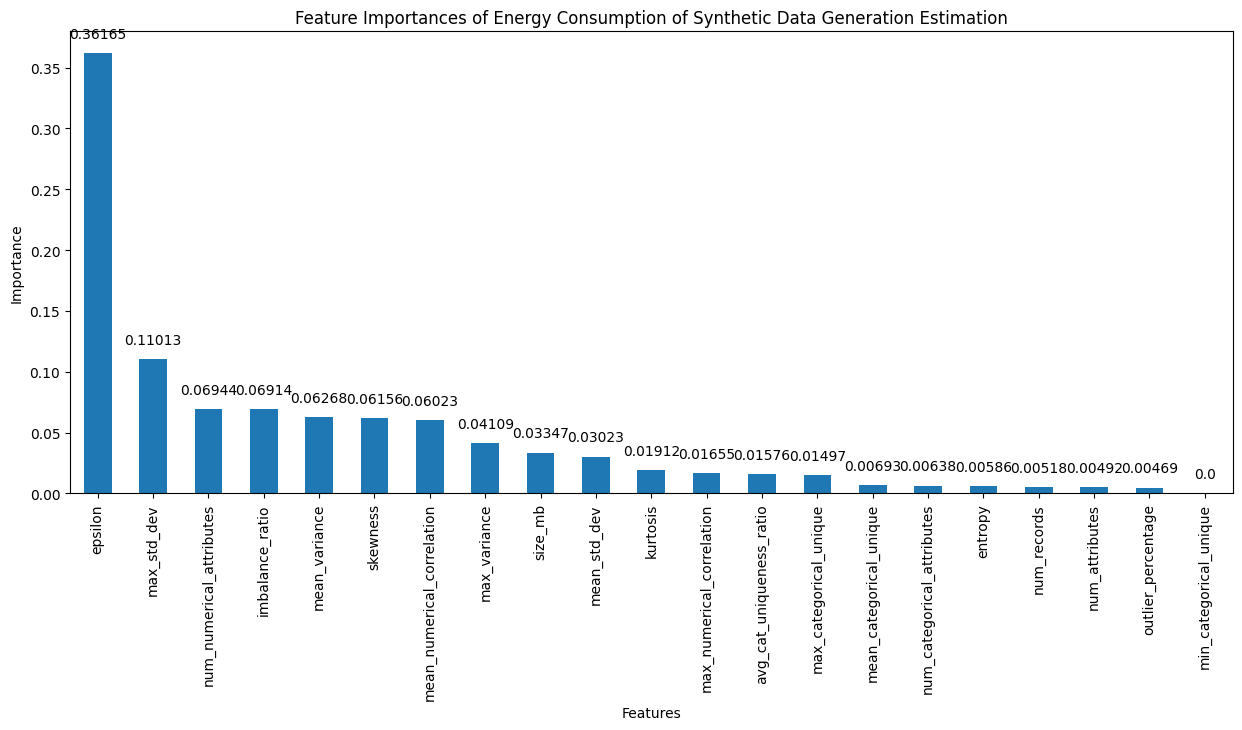

In [ ]:

a, aa, aaa, all_importances_regular  = our_ml(data, 0.19, features, 100, 0.1, 3, target_ml, 0)
# print(all_importances_regular)
# importances_sorted = first_importances.sort_values(ascending=False)
importances_sorted = all_importances_regular.sort_values(ascending=False)
importances_sorted_no_epsilon = importances_sorted.drop('epsilon')
print(importances_sorted_no_epsilon)
importances_sorted_no_epsilon_list = importances_sorted_no_epsilon.index.to_list()
lists_ttt = [importances_sorted_no_epsilon[:(i)].index.to_list() for i in range(4, 21)]
lists_ttt = [ ['epsilon'] + i
             for i in lists_ttt
]
# pd.options.display.float_format = '{:.4f}'.format

importances_sorted = importances_sorted.round(5)
print(importances_sorted)
# Plot the feature importances
plt.figure(figsize=(15, 6))
ax = importances_sorted.plot(kind='bar')
for i, v in enumerate(importances_sorted.values):
    ax.text(i, v + 0.01, f'{v}', ha='center', va='bottom')
plt.title('Feature Importances of Energy Consumption of Synthetic Data Generation Estimation')
plt.xlabel('Features')
plt.ylabel('Importance')
# plt.savefig('energy_importances.png')
plt.show()


In [10]:
start_time_total = datetime.now()

ests = [100]
lss = 0.1
existing_r2s_1 = set()
for l in lists_ttt:
    start_time = datetime.now()
    for i in range(4, len(l)):
        print(f'\r{i - 3} out of {len(l) - 4 }', end='\r',  flush=True)
        for es in ests:
            
            sfs_params, sfs_features, o_r2, o_mse, selected_features_df, o_acc = our_sfs_ml(
                        dataset=data, test_size=0.19, our_features=l, 
                        estimators=es, learning_rate=0.1, depth=3, n_features=i, scalee=0, direction_s='forward'
                    )
            # if o_r2 > 0:
            if o_r2 < 0.3:
                continue
            if o_r2 in existing_r2s_1:
                continue
            existing_r2s_1.add(o_r2)
            print(f'Learning rate: 0.1')
            print(f'Estimators: {es}')
            print(f'Input Features: {l}')
            print(f'Number of Features to choose {i}')
            print(sfs_features)
            print(f'R2: {o_r2}')
            print( f'MSE: {o_mse}')
            print(  selected_features_df)
            print(f'Comparison Accuracy: {o_acc}')
            print('\n')


    end_time = datetime.now()

    elapsed_time = (end_time - start_time).total_seconds() / 60

    print(f"Elapsed time: {elapsed_time:.2f} minutes with list size {len(l)}")
end_time_total = datetime.now()

elapsed_time_total = (end_time_total - start_time_total).total_seconds() / 60

print(f"Total lapsed time: {elapsed_time_total:.2f} minutes")
"""  
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'max_std_dev', 'num_continuous_attributes', 'imbalance_ratio', 'mean_variance', 'skewness', 'mean_continuous_correlation', 'max_variance', 'size_mb', 'mean_std_dev', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']
Number of Features to choose 9
['epsilon', 'imbalance_ratio', 'skewness', 'mean_continuous_correlation', 'size_mb', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']
R2: 0.41304996327337007
MSE: 0.023266293260116186
                      Feature  Importance  Importance_Percentage
0                     epsilon    0.365092              36.509193
2                    skewness    0.158223              15.822332
1             imbalance_ratio    0.148692              14.869249
3  mean_continuous_correlation    0.106955              10.695489
4                     size_mb    0.066674               6.667406
5                    kurtosis    0.053092               5.309235
8      max_categorical_unique    0.048180               4.817974
7    avg_cat_uniqueness_ratio    0.038471               3.847087
6   max_continuous_correlation    0.014620               1.462036
Comparison Accuracy: 96.55172413793103

"""



Elapsed time: 0.20 minutes with list size 5
Elapsed time: 0.17 minutes with list size 6
Elapsed time: 0.27 minutes with list size 7
Elapsed time: 0.64 minutes with list size 8
Elapsed time: 1.04 minutes with list size 9
Elapsed time: 1.41 minutes with list size 10
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'max_std_dev', 'num_continuous_attributes', 'imbalance_ratio', 'mean_variance', 'skewness', 'mean_continuous_correlation', 'max_variance', 'size_mb', 'mean_std_dev', 'kurtosis']
Number of Features to choose 4
['epsilon', 'skewness', 'mean_continuous_correlation', 'kurtosis']
R2: 0.4157385979097846
MSE: 0.023159717643784362
                      Feature  Importance  Importance_Percentage
0                     epsilon    0.373256              37.325557
1                    skewness    0.320778              32.077760
3                    kurtosis    0.176841              17.684055
2  mean_continuous_correlation    0.129126              12.912629
Comparison Accuracy: 

"  \nLearning rate: 0.1\nEstimators: 100\nInput Features: ['epsilon', 'max_std_dev', 'num_continuous_attributes', 'imbalance_ratio', 'mean_variance', 'skewness', 'mean_continuous_correlation', 'max_variance', 'size_mb', 'mean_std_dev', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']\nNumber of Features to choose 9\n['epsilon', 'imbalance_ratio', 'skewness', 'mean_continuous_correlation', 'size_mb', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']\nR2: 0.41304996327337007\nMSE: 0.023266293260116186\n                      Feature  Importance  Importance_Percentage\n0                     epsilon    0.365092              36.509193\n2                    skewness    0.158223              15.822332\n1             imbalance_ratio    0.148692              14.869249\n3  mean_continuous_correlation    0.106955              10.695489\n4                     size_mb    0.066674               6.667406\n5   

In [11]:
start_time_total = datetime.now()

ests = [100]
lss = 0.1
existing_r2s_2 = set()
for l in lists_ttt:
    start_time = datetime.now()
    for i in range(4, len(l)):
        print(f'\r{i - 3} out of {len(l) - 4 }', end='\r',  flush=True)
        for es in ests:
            
            sfs_params, sfs_features, o_r2, o_mse, selected_features_df, o_acc = our_sfs_ml(
                        dataset=data, test_size=0.19, our_features=l, 
                        estimators=es, learning_rate=0.1, depth=3, n_features=i, scalee=0, direction_s='backward'
                    )
            if o_r2 < 0.3:
                continue
            if o_r2 in existing_r2s_1:
                continue
            existing_r2s_1.add(o_r2)    
            print(f'Learning rate: {lss}')
            print(f'Estimators: {es}')
            print(f'Input Features: {l}')
            print(f'Number of Features to choose {i}')
            print(sfs_features)
            print(f'R2: {o_r2}')
            print( f'MSE: {o_mse}')
            print(  selected_features_df)
            print(f'Comparison Accuracy: {o_acc}')
            print('\n')


    end_time = datetime.now()

    elapsed_time = (end_time - start_time).total_seconds() / 60

    print(f"Elapsed time: {elapsed_time:.2f} minutes with list size {len(l)}")
end_time_total = datetime.now()

elapsed_time_total = (end_time_total - start_time_total).total_seconds() / 60

print(f"Total lapsed time: {elapsed_time_total:.2f} minutes")
"""  
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'max_std_dev', 'num_continuous_attributes', 'imbalance_ratio', 'mean_variance', 'skewness', 'mean_continuous_correlation', 'max_variance', 'size_mb', 'mean_std_dev', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique', 'mean_categorical_unique']
Number of Features to choose 5
['epsilon', 'mean_continuous_correlation', 'kurtosis', 'avg_cat_uniqueness_ratio', 'mean_categorical_unique']
R2: 0.3330885057623064
MSE: 0.026435910098942972
                      Feature  Importance  Importance_Percentage
0                     epsilon    0.368739              36.873864
2                    kurtosis    0.270079              27.007900
1  mean_continuous_correlation    0.173780              17.378050
4     mean_categorical_unique    0.123899              12.389896
3    avg_cat_uniqueness_ratio    0.063503               6.350290
Comparison Accuracy: 93.10344827586206

"""


Elapsed time: 0.01 minutes with list size 5
Elapsed time: 0.02 minutes with list size 6
Elapsed time: 0.08 minutes with list size 7
Elapsed time: 0.15 minutes with list size 8
Elapsed time: 0.26 minutes with list size 9
Elapsed time: 0.39 minutes with list size 10
Elapsed time: 0.58 minutes with list size 11
Elapsed time: 0.94 minutes with list size 12
Elapsed time: 1.45 minutes with list size 13
Elapsed time: 1.84 minutes with list size 14
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'max_std_dev', 'num_continuous_attributes', 'imbalance_ratio', 'mean_variance', 'skewness', 'mean_continuous_correlation', 'max_variance', 'size_mb', 'mean_std_dev', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique', 'mean_categorical_unique']
Number of Features to choose 4
['epsilon', 'mean_continuous_correlation', 'kurtosis', 'mean_categorical_unique']
R2: 0.3228311815250895
MSE: 0.026842503333178235
                      Feature  Importance

"  \nLearning rate: 0.1\nEstimators: 100\nInput Features: ['epsilon', 'max_std_dev', 'num_continuous_attributes', 'imbalance_ratio', 'mean_variance', 'skewness', 'mean_continuous_correlation', 'max_variance', 'size_mb', 'mean_std_dev', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique', 'mean_categorical_unique']\nNumber of Features to choose 5\n['epsilon', 'mean_continuous_correlation', 'kurtosis', 'avg_cat_uniqueness_ratio', 'mean_categorical_unique']\nR2: 0.3330885057623064\nMSE: 0.026435910098942972\n                      Feature  Importance  Importance_Percentage\n0                     epsilon    0.368739              36.873864\n2                    kurtosis    0.270079              27.007900\n1  mean_continuous_correlation    0.173780              17.378050\n4     mean_categorical_unique    0.123899              12.389896\n3    avg_cat_uniqueness_ratio    0.063503               6.350290\nComparison Accuracy: 93.10344827586206\n\n"

In [6]:
best_features_1 = ['epsilon', 'imbalance_ratio', 'skewness', 'mean_continuous_correlation', 'size_mb',
                    'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']


best_1, best_predictions, best_actual, best_importances  = our_ml(data, 0.19, best_features_1 , 100, 0.1, 3, target_ml, 0)

Conditions:
Size: 304
Test size percent is: 0.19
Attributes: ['epsilon', 'imbalance_ratio', 'skewness', 'mean_continuous_correlation', 'size_mb', 'kurtosis', 'max_continuous_correlation', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']
Actual
[0.95035461, 0.780141844, 0.7, 0.835, 0.884645062, 0.77507716, 1.0, 0.21749409, 0.899280576, 0.726618705, 0.835931454, 0.745273632, 0.9, 0.846153846, 0.772727273, 0.36722488, 0.871823204, 0.708287293, 0.894504036, 0.650669026, 0.834329349, 0.714475432, 0.837394331, 0.746726338, 0.67, 0.515, 0.6625, 0.8025, 0.783333333, 0.536666667, 0.736, 0.58, 0.95, 0.52, 0.706896552, 0.586206897, 0.966446645, 0.418866887, 0.903, 0.486, 0.95, 0.57, 0.66, 0.575, 0.615, 0.925, 0.705, 0.58, 0.932285714, 0.689571429, 0.84532925, 0.672128637, 0.898153268, 0.727302886, 0.336870027, 0.172413793, 0.263537906, 0.281588448]
Prediction
[0.8287127  0.54651432 0.73498032 0.6465674  0.69643302 0.68686448
 0.6452044  0.6341017  0.79598609 0.58765258 0.83383387 0.74147503


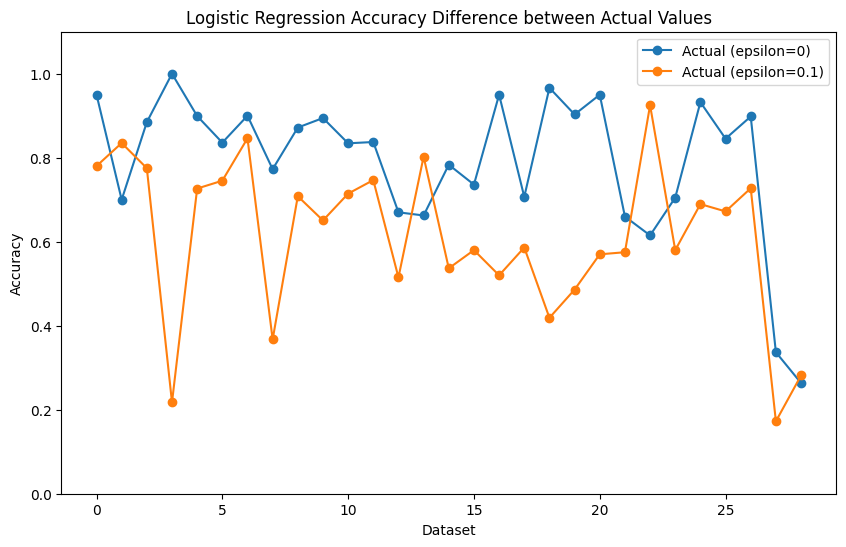

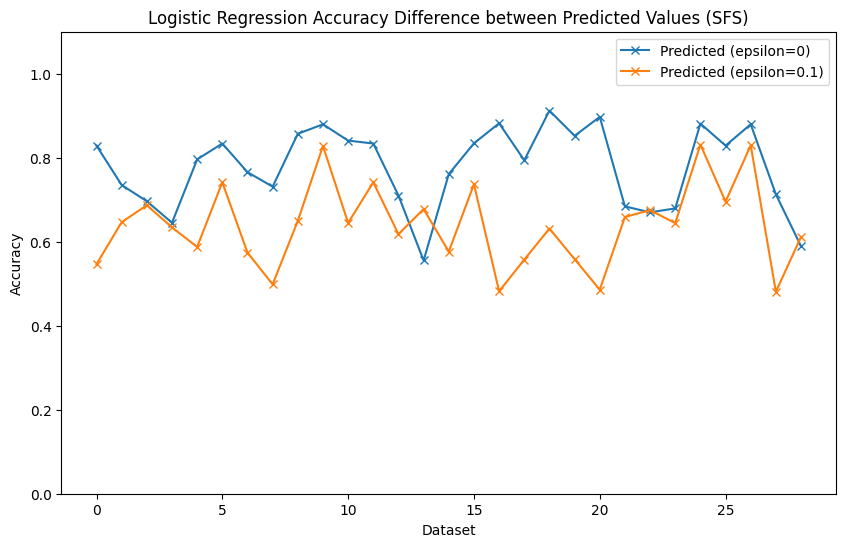

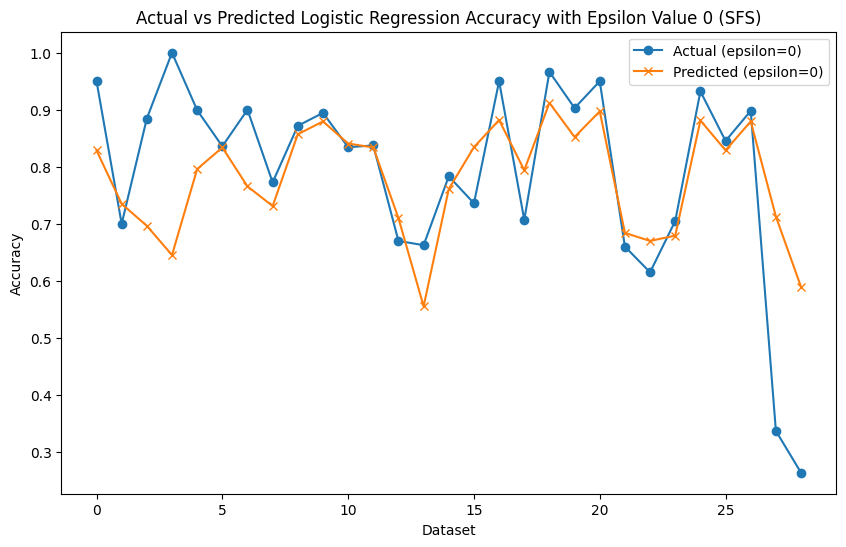

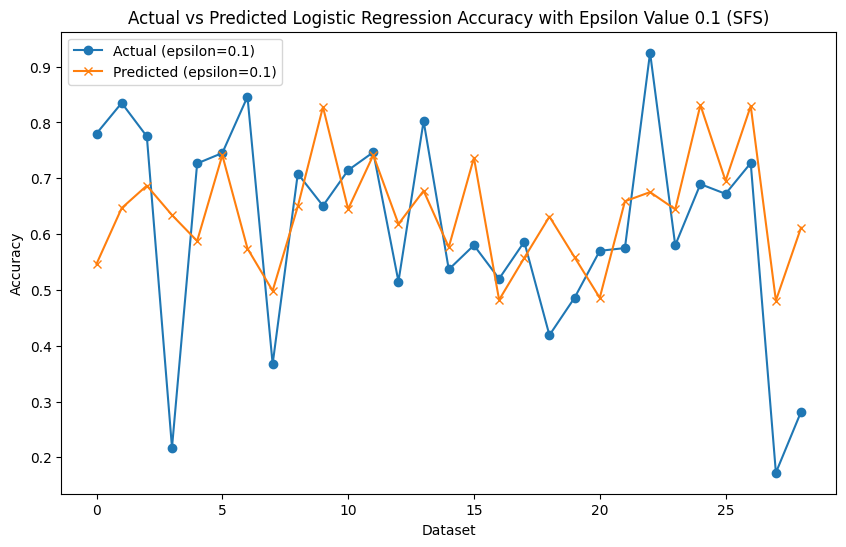

In [ ]:
import matplotlib.pyplot as plt

# Separate the data by epsilon
best_actual_0 = [best_actual[i] for i in range(0, len(best_actual), 2)]   # Actual values for epsilon 0
best_actual_01 = [best_actual[i] for i in range(1, len(best_actual), 2)]  # Actual values for epsilon 0.1
y_pred_0 = [best_predictions[i] for i in range(0, len(best_predictions), 2)]  # Predicted values for epsilon 0
y_pred_01 = [best_predictions[i] for i in range(1, len(best_predictions), 2)] # Predicted values for epsilon 0.1

# Generate the x-axis indices
x_indices_0 = range(len(best_actual_0))     # Indices for epsilon 0
x_indices_01 = range(len(best_actual_01))   # Indices for epsilon 0.1
y_min = 0
# y_max = max(max(best_actual_0), max(best_actual_01), max(y_pred_0), max(y_pred_01))
y_max = 1.1
# Plot 1: Difference between actual values
plt.figure(figsize=(10, 6))
plt.plot(x_indices_0, best_actual_0, label='Actual (epsilon=0)', marker='o')
plt.plot(x_indices_01, best_actual_01, label='Actual (epsilon=0.1)', marker='o')
plt.ylim(y_min, y_max)
plt.title('Logistic Regression Accuracy Difference between Actual Values')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('log_res_accuracy_difference_between_actual_values.png')  
plt.show()

# Plot 2: Difference between predicted values
plt.figure(figsize=(10, 6))
plt.plot(x_indices_0, y_pred_0, label='Predicted (epsilon=0)', marker='x')
plt.plot(x_indices_01, y_pred_01, label='Predicted (epsilon=0.1)', marker='x')
plt.ylim(y_min, y_max)
plt.title('Logistic Regression Accuracy Difference between Predicted Values (SFS)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('log_res_accuracy_difference_between_predicted_values.png')  
plt.show()

# Plot 3: Actual vs Predicted for epsilon 0
plt.figure(figsize=(10, 6))
plt.plot(x_indices_0, best_actual_0, label='Actual (epsilon=0)', marker='o')
plt.plot(x_indices_0, y_pred_0, label='Predicted (epsilon=0)', marker='x')
plt.title('Actual vs Predicted Logistic Regression Accuracy with Epsilon Value 0 (SFS)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('log_res_accuracy_actual_vs_predicted_epsilon_0.png')  
plt.show()

# Plot 4: Actual vs Predicted for epsilon 0.1
plt.figure(figsize=(10, 6))
plt.plot(x_indices_01, best_actual_01, label='Actual (epsilon=0.1)', marker='o')
plt.plot(x_indices_01, y_pred_01, label='Predicted (epsilon=0.1)', marker='x')
plt.title('Actual vs Predicted Logistic Regression Accuracy with Epsilon Value 0.1 (SFS)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('log_res_accuracy_actual_vs_predicted_epsilon_01.png')  
plt.show()


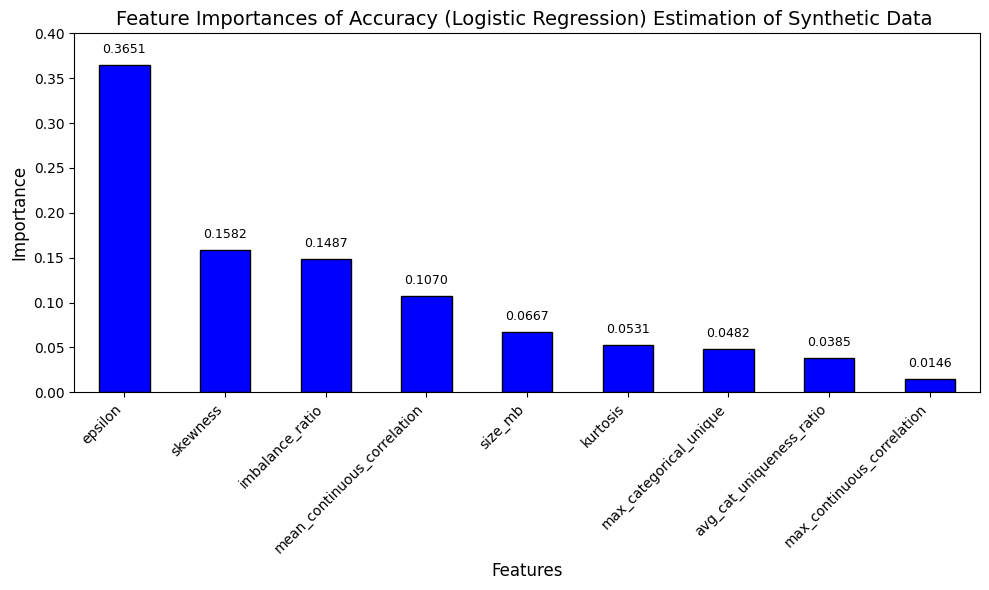

In [ ]:
importances_sorted = best_importances.sort_values(ascending=False)

# Set display options for rounded float format
pd.options.display.float_format = '{:.3f}'.format  # Set to 3 decimal places

# Plot the feature importances
plt.figure(figsize=(10, 6))
ax = importances_sorted.plot(kind='bar', color='blue', edgecolor='black')

# Add rounded values above bars
for i, v in enumerate(importances_sorted.values):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=9)  # Rounded to 3 decimals

# Improve axis labels and title
plt.title('Feature Importances of Accuracy (Logistic Regression) Estimation of Synthetic Data ', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.ylim(0, 0.4)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to fit all elements

plt.savefig('log_res_accuracy_importances.png')
plt.show()


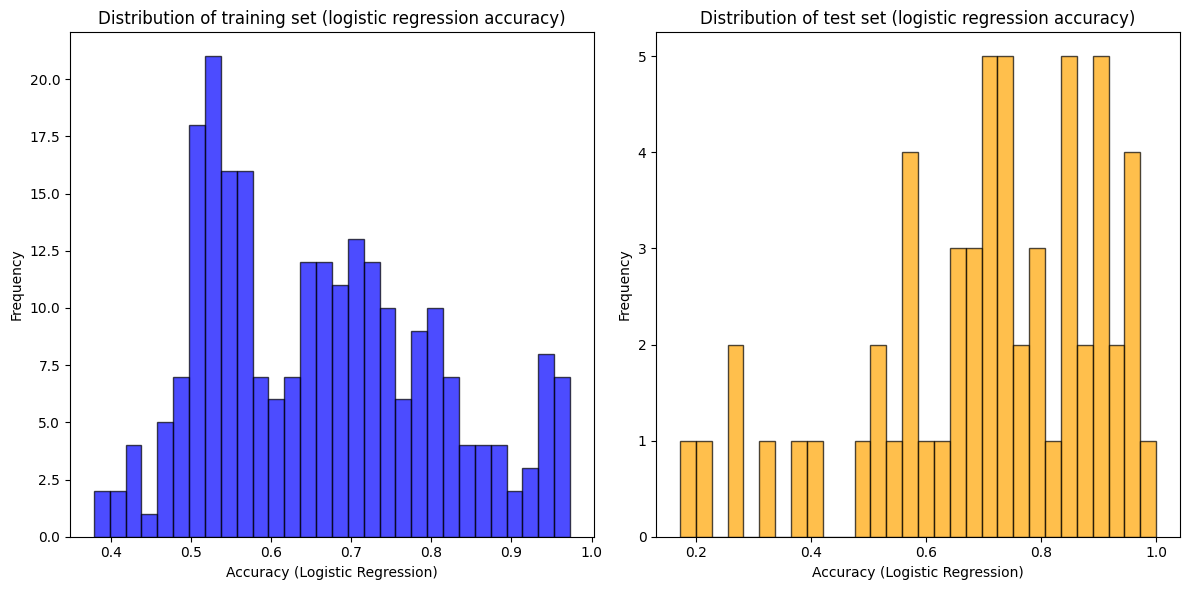

In [ ]:
split_index = int(0.19 * len(data))
if split_index % 2 != 0:
    split_index += 1
y = data[target_ml]
y_train = y.iloc[split_index:]
y_test = y.iloc[:split_index]

plt.figure(figsize=(12, 6))

# Histogram for y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of training set (logistic regression accuracy)')
plt.xlabel('Accuracy (Logistic Regression)')
plt.ylabel('Frequency')

# Histogram for y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of test set (logistic regression accuracy)')
plt.xlabel('Accuracy (Logistic Regression)')
plt.ylabel('Frequency')
plt.savefig('log_res_accuracy_distribution.png')

plt.tight_layout()
plt.show()